In [149]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [252]:
#Changing defaults fonts for plot

font = {'family' : 'sans-serif',
        'size'   : 18}
plt.rc('font', **font)

In [2]:
#Reading necessary data files
df= pd.read_csv("all3_ML_AvgPrecp.csv")

sono= pd.read_csv("Sonoma_ML_AvgPrecp.csv")
coast= pd.read_csv("Coast_ML_AvgPrecp.csv")
valley= pd.read_csv("Valley_ML_AvgPrecp.csv")

In [4]:
y =  df["Rating"]

In [5]:
X = df.iloc[:,2:] #Features start on column 2

In [261]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) #Filling in NaNs with the mean of the column
imp.fit(X)
fillX = imp.transform(X)
scaler = StandardScaler()
scaleX = scaler.fit_transform(fillX)  #Scaling features to have mean 0 and unit variance

In [151]:
trainX = scaleX[:50]

In [153]:
testX = scaleX[50:]

In [154]:
trainy = y[:50]

In [242]:
#fit = SVR(kernel='linear', C=1)
#fit = Ridge(alpha=0.00001,normalize=True)
fit = Lasso(alpha=0.00001)

In [257]:
y_fit = fit.fit(trainX, trainy)
score = fit.score(trainX,trainy)

In [244]:
train_predict = y_fit.predict(trainX) #Model predictions on training data

In [258]:
score #R^2 value

0.45254231912533516

In [245]:
test_predict = y_fit.predict(testX) #Model predictions on data not trained on

In [246]:
years = list(range(1996,2016)) #Range of years to plot on x axis

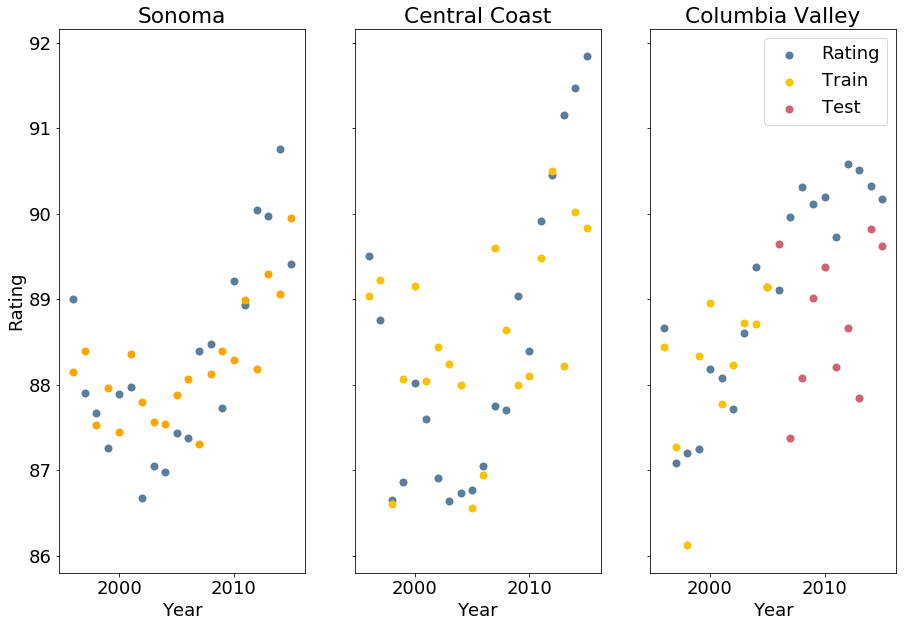

In [265]:
plt.close("all")

fig, ax = plt.subplots(1,3, sharey=True, sharex=True, figsize = (15,10))

ax[0].scatter(years, df.iloc[:20,1], color="xkcd:steel blue", lw=2, label="Rating")
ax[0].scatter(years,train_predict[:20], color="orange", lw=2, label="Train")

ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rating")
ax[0].set_title("Sonoma")


ax[1].scatter(years, df.iloc[20:40,1], color="xkcd:steel blue", lw=2, label="Central Coast")
ax[1].scatter(years, train_predict[20:40], color="xkcd:goldenrod", lw=2, label="Train")

ax[1].set_xlabel("Year")
ax[1].set_title("Central Coast")

ax[2].scatter(years, df.iloc[40:,1], color="xkcd:steel blue", lw=2, label="Rating")
ax[2].scatter(years[:10], train_predict[40:], color="xkcd:goldenrod", lw=2, label="Train")
ax[2].scatter(years[10:], test_predict, color="xkcd:rose", lw=2, label="Test")

ax[2].set_xlabel("Year")
ax[2].set_title("Columbia Valley")
ax[2].legend(loc="best")

plt.savefig("ML_Data.png")
plt.show()

In [250]:
y_fit.coef_

array([-0.30827964,  0.80209511, -0.11864112, -0.30423764, -0.31579223,
       -0.77829575,  0.05858261,  0.59654882, -0.30139356, -0.0762819 ,
        0.45087883,  0.27684667, -0.3131092 , -0.27023968, -0.01217825,
        0.44561238, -0.14752751, -0.76234227, -0.06524319,  1.13815851,
        0.16406254, -0.28524668,  0.23222101, -0.65422123])